## Machine Learning

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


### Regression

In [0]:
df = pd.read_csv('House_data_LR.csv')
df.head()

,Unnamed: 0,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0


In [0]:
df.isnull().any() 

Unnamed: 0     False
sqft_living    False
price          False
dtype: bool

In [0]:
df.drop('Unnamed: 0', axis = 1, inplace = True)


In [0]:
df

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1225000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


In [0]:
X = df.iloc[:, :1].values # to get X as 2D
y = df.iloc[:, -1].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

### Split data into train and test

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Simple Linear Regression

    y = b0 + b1 * x1 
    
    y - dependent variable
    x - independent variable
    b0 - constant
    b1 - coefficient

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

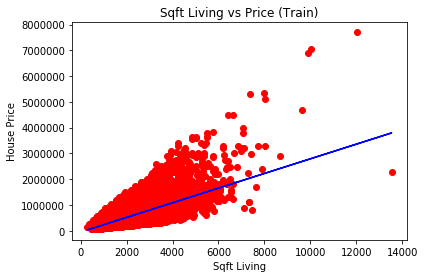

Text(0,0.5,'House Price')

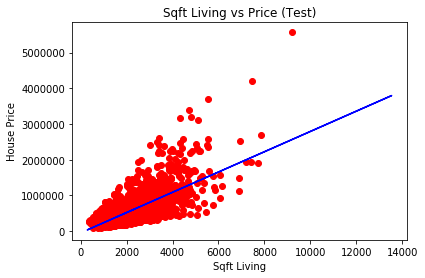

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict the test set results
y_pred = lr.predict(X_test)

# Training set
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_train, lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price (Train)')
plt.xlabel('Sqft Living')
plt.ylabel('House Price')
plt.show()

# Test set
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_train, lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price (Test)')
plt.xlabel('Sqft Living')
plt.ylabel('House Price')


In [0]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2,  lr.coef_, lr.intercept_

(248879.06124185046,
 0.4791577237265374,
 0.47913362293174433,
 array([283.96855716]),
 -48257.063591028564)

In [0]:
import numpy as np
x_new=np.array([1200]).reshape(1,1)
lr.predict(x_new)

array([292505.20499513])

### Multiple Linear Regression

    y = b0 + (b1 * x1) + (b2 * x2) + (b3 * x3)
    
    y - dependent variable
    x1, x2, x3 - independent variables
    b0 - constant
    b1, b2, b3 - coefficients
    

In [0]:
df = pd.read_csv('House_data_MLR.csv')
df.head()

,sqft_living,view,bedrooms,bathrooms,sqft_basement,price
0,1180,0,3,1.00,0,221900.0
1,2570,0,3,2.25,400,538000.0
2,770,0,2,1.00,0,180000.0
3,1960,0,4,3.00,910,604000.0
4,1680,0,3,2.00,0,510000.0


In [0]:
df.isnull().any()


sqft_living      False
view             False
bedrooms         False
bathrooms        False
sqft_basement    False
price            False
dtype: bool

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X
#y

array([[1.18e+03, 0.00e+00, 3.00e+00, 1.00e+00, 0.00e+00],
       [2.57e+03, 0.00e+00, 3.00e+00, 2.25e+00, 4.00e+02],
       [7.70e+02, 0.00e+00, 2.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [1.02e+03, 0.00e+00, 2.00e+00, 7.50e-01, 0.00e+00],
       [1.60e+03, 0.00e+00, 3.00e+00, 2.50e+00, 0.00e+00],
       [1.02e+03, 0.00e+00, 2.00e+00, 7.50e-01, 0.00e+00]])

### Encoding categorical columns

    Encode dummy variables if they are of string datatypes
    Use OneHotEncoding to create corresponding columns
    Use only n-1 dummy columns, that is drop one dummy column to avoid dummy variable trap.

Dummy Variable Trap: If both constant term and an exhaustive set of dummies are present, perfect multicollinearity (one predictor variable in a multiple regression model can be linearly predicted from the other, the correlation between two independent variables is equal to 1 or −1) occurs, and the system of equations formed by the regression does not have a unique solution. This is referred to as the dummy variable trap. The trap can be avoided by removing either the constant term or one of the offending dummies. The removed dummy then becomes the base category against which the other categories are compared


https://en.wikipedia.org/wiki/Multicollinearity

https://en.wikipedia.org/wiki/Dummy_variable_(statistics)

In [0]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [0]:
df_d = pd.get_dummies(df, columns = ["view"])
df_d.head(20)

,sqft_living,bedrooms,bathrooms,sqft_basement,price,view_0,view_1,view_2,view_3,view_4
0,1180,3,1.00,0,221900.0,1,0,0,0,0
1,2570,3,2.25,400,538000.0,1,0,0,0,0
2,770,2,1.00,0,180000.0,1,0,0,0,0
3,1960,4,3.00,910,604000.0,1,0,0,0,0
4,1680,3,2.00,0,510000.0,1,0,0,0,0
5,5420,4,4.50,1530,1225000.0,1,0,0,0,0
6,1715,3,2.25,0,257500.0,1,0,0,0,0
7,1060,3,1.50,0,291850.0,1,0,0,0,0
8,1780,3,1.00,730,229500.0,1,0,0,0,0
9,1890,3,2.50,0,323000.0,1,0,0,0,0


In [0]:
X[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
#1. Encode dummy variables if they are of string datatypes

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()  
X[:, 1] = le.fit_transform(X[:, 1])
print(X)
#2. Use OneHotEncoding to create corresponding columns

onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = np.round(X)

#3. Use only n-1 dummy columns, that is drop one dummy column to avoid dummy variable trap.

# X = X[:, 1:] # We will not use this for sklearn Linear regression as the library takes care of it


[[1.18e+03 0.00e+00 3.00e+00 1.00e+00 0.00e+00]
 [2.57e+03 0.00e+00 3.00e+00 2.25e+00 4.00e+02]
 [7.70e+02 0.00e+00 2.00e+00 1.00e+00 0.00e+00]
 ...
 [1.02e+03 0.00e+00 2.00e+00 7.50e-01 0.00e+00]
 [1.60e+03 0.00e+00 3.00e+00 2.50e+00 0.00e+00]
 [1.02e+03 0.00e+00 2.00e+00 7.50e-01 0.00e+00]]


C:\Users\SrivastavA12\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\SrivastavA12\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#predict the test set results
y_pred = mlr.predict(X_test)


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, mlr.coef_, mlr.intercept_

(235364.45119249323,
 0.5341873848561487,
 0.5339933232195105,
 array([-2.22237443e+05, -5.53929060e+04, -1.05988711e+05, -2.11699014e+04,
         4.04788961e+05,  2.69176765e+02, -4.78110015e+04,  3.41184619e+04,
        -9.35904880e+00]),
 275964.4377363802)

### Multiple Linear Regression 

Entire Dataset with multiple categorical columns

In [0]:
df = pd.read_csv('House_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


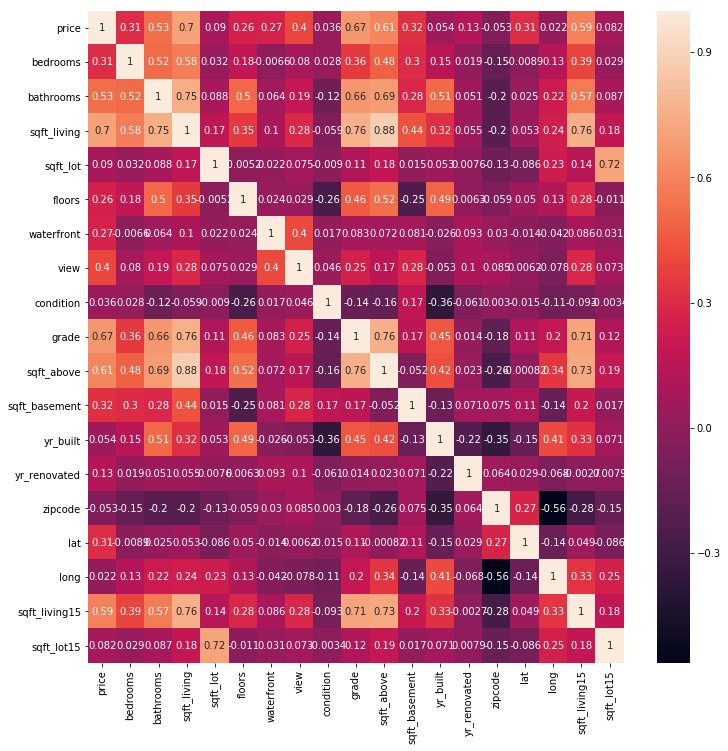

In [0]:
df.drop(['id', 'date'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.heatmap(df.corr(),annot = True)

#### Data Cleaning

In [0]:
df.isnull().any()
df['basement'] = (df['sqft_basement'] > 0).astype(int)
df['renovated'] = (df['yr_renovated'] > 0).astype(int)

to_drop = ['sqft_basement', 'yr_renovated']
df.drop(to_drop, axis = 1, inplace = True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


#### Handling Categorical Columns

In [0]:
cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors','zipcode']

df = pd.get_dummies(df, columns = cat_cols, drop_first=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1180,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2170,1951,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,770,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1680,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


#### Multiple Linear Regression Model

In [0]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#predict the test set results
y_pred = mlr.predict(X_test)


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2

(137447.241059456, 0.8411447538287411, 0.8403617790266322)

### Feature Selection

Feature Extraction: 

When performing analysis of complex data one of the major problems stems from the number of variables involved. Analysis with a large number of variables generally requires a large amount of memory and computation power, also it may cause algorithm to overfit to training samples and generalize poorly to new samples. Feature extraction is a general term for methods of constructing combinations of the variables to get around these problems while still describing the data with sufficient accuracy

    Transform two or more features that perform badly in your model due to possible mutual correlation into a single feature that performs more effectively
    PCA (principal component analysis), SVD (singular value decomposition)

Feature Selection:

    Choose features from the original set based on some criteria like Information Gain, Correlation and Mutual Information. 
    
Out of plenty of feature selection methods available **Tree** based and **Correlation** are most usefull.

1. Variance Threshold
2. Select K-best (Chi-2)
3. Recursive Feature Elimination
4. Tree based feature selection

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

http://scikit-learn.org/stable/modules/feature_selection.html

In [0]:
df = pd.read_csv('House_data.csv')
df.isnull().any()
df['basement'] = (df['sqft_basement'] > 0).astype(int)
df['renovated'] = (df['yr_renovated'] > 0).astype(int)
to_drop = ['id', 'date', 'sqft_basement', 'yr_renovated']
df.drop(to_drop, axis = 1, inplace = True)
cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors']
df = pd.get_dummies(df, columns = cat_cols, drop_first=True)

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_


C:\Users\SrivastavA12\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([4.51135199e-02, 5.78542454e-02, 9.05959144e-02, 9.76121174e-02,
       8.95136825e-02, 8.61166460e-02, 6.38266863e-02, 1.02289602e-01,
       9.22701162e-02, 9.15700079e-02, 9.28441047e-02, 1.27481302e-02,
       6.99215944e-03, 1.16293328e-03, 3.89572328e-03, 8.15895185e-03,
       4.33218912e-03, 2.04534159e-03, 1.51458349e-03, 9.77013984e-03,
       9.91683479e-03, 4.75103699e-03, 5.61258413e-05, 1.65355412e-04,
       3.33139382e-04, 6.06894842e-04, 6.76849353e-04, 1.08590917e-03,
       1.06025157e-03, 9.85221008e-04, 7.45556401e-04, 3.29833589e-04,
       1.11118201e-04, 6.68743937e-03, 9.13256542e-03, 1.52160215e-03,
       1.49623972e-03, 1.11232040e-04])

In [0]:
importances = tree_clf.feature_importances_
feature_names = df.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
feature_imp_dir

{'basement': 0.012748130226151585,
 'bathrooms': 0.057854245419774665,
 'bedrooms': 0.04511351992816055,
 'condition_2': 0.0015145834929174986,
 'condition_3': 0.009770139841051045,
 'condition_4': 0.009916834793038726,
 'condition_5': 0.004751036993892806,
 'floors_1.5': 0.00668743936959536,
 'floors_2.0': 0.00913256541688085,
 'floors_2.5': 0.0015216021528787573,
 'floors_3.0': 0.0014962397246381805,
 'floors_3.5': 0.0001112320397014082,
 'grade_10': 0.0009852210079341608,
 'grade_11': 0.0007455564011090484,
 'grade_12': 0.00032983358865782336,
 'grade_13': 0.00011111820107575013,
 'grade_3': 5.612584132931351e-05,
 'grade_4': 0.00016535541159068602,
 'grade_5': 0.00033313938231300784,
 'grade_6': 0.0006068948417749091,
 'grade_7': 0.0006768493534765674,
 'grade_8': 0.001085909172724457,
 'grade_9': 0.001060251573515361,
 'lat': 0.10228960184452356,
 'long': 0.09227011622553587,
 'renovated': 0.006992159441931091,
 'sqft_above': 0.08951368250035101,
 'sqft_living': 0.0905959144038512

In [0]:
plt.bar(range(len(features)), [imp[1] for imp in features], align='center')
plt.title('important features in house data');

NameError: ignored

In [0]:
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])

Total Features count: 38
Selected Features:  11


In [0]:
X[:2]

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.18000e+03,  1.95500e+03,  9.81780e+04,  4.75112e+01,
        -1.22257e+02,  1.34000e+03,  5.65000e+03,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03,  7.24200e+03,
         2.17000e+03,  1.95100e+03,  9.81250e+04,  4.77210e+01,
        -1.22319e+02,  1.69000e+03,  7.63900e+03,  1.00000e+00,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
   

In [0]:
x_updated[:5]

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.18000e+03,  1.95500e+03,  9.81780e+04,  4.75112e+01,
        -1.22257e+02,  1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03,  7.24200e+03,
         2.17000e+03,  1.95100e+03,  9.81250e+04,  4.77210e+01,
        -1.22319e+02,  1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02,  1.00000e+04,
         7.70000e+02,  1.93300e+03,  9.80280e+04,  4.77379e+01,
        -1.22233e+02,  2.72000e+03,  8.06200e+03],
       [ 4.00000e+00,  3.00000e+00,  1.96000e+03,  5.00000e+03,
         1.05000e+03,  1.96500e+03,  9.81360e+04,  4.75208e+01,
        -1.22393e+02,  1.36000e+03,  5.00000e+03],
       [ 3.00000e+00,  2.00000e+00,  1.68000e+03,  8.08000e+03,
         1.68000e+03,  1.98700e+03,  9.80740e+04,  4.76168e+01,
        -1.22045e+02,  1.80000e+03,  7.50300e+03]])

In [0]:
y = df.iloc[:, 0].values

#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_updated, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



152335.56053853413

In [0]:
#fit the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#predict the test set results
y_pred_lr = mlr.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred_lr))

211218.05216062613

In [0]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test, y_pred_lr)

r2_knn=r2_score(y_test, y_pred_knn)
r2_lr, r2_knn

(0.6248615541438001, 0.8048663814220858)

### Estimating total Interactions for facebook dataset

In [0]:
# load the facebook dataset
df = pd.read_csv('dataset_Facebook.csv', sep=';')
# print the head of the dataframe
df.head(20)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


In [0]:
df.isnull().any()

Page total likes                                                       False
Type                                                                   False
Category                                                               False
Post Month                                                             False
Post Weekday                                                           False
Post Hour                                                              False
Paid                                                                    True
Lifetime Post Total Reach                                              False
Lifetime Post Total Impressions                                        False
Lifetime Engaged Users                                                 False
Lifetime Post Consumers                                                False
Lifetime Post Consumptions                                             False
Lifetime Post Impressions by people who have liked your Page           False

In [0]:
pd.isnull(df['Paid']).sum()


1

In [0]:
df.fillna(df.mean(), inplace = True)
df.isnull().any()

Page total likes                                                       False
Type                                                                   False
Category                                                               False
Post Month                                                             False
Post Weekday                                                           False
Post Hour                                                              False
Paid                                                                   False
Lifetime Post Total Reach                                              False
Lifetime Post Total Impressions                                        False
Lifetime Engaged Users                                                 False
Lifetime Post Consumers                                                False
Lifetime Post Consumptions                                             False
Lifetime Post Impressions by people who have liked your Page           False

### Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
le.classes_

array([0, 1, 2, 3])

### Feature Selection

In [0]:
# import the classifier
from sklearn.ensemble import ExtraTreesClassifier

# create an instance
tree_clf = ExtraTreesClassifier()

y = df['Total Interactions'].tolist()

# remove target column from the df
df_features = df.drop('Total Interactions', axis=1)

# store features in X array
X = df_features.values

# check top 2 values
X[:2]

tree_clf.fit(X, y)
tree_clf.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.0582548 , 0.01455956, 0.02502131, 0.05508076, 0.05526102,
       0.06102609, 0.02956491, 0.05655325, 0.05369118, 0.06102565,
       0.06364531, 0.06055725, 0.0578222 , 0.05409021, 0.06369994,
       0.06702373, 0.08873922, 0.07438359])

Feature ranking:
feature 16 : like (0.088739)
feature 17 : share (0.074384)
feature 15 : comment (0.067024)
feature 14 : Lifetime People who have liked your Page and engaged with your post (0.063700)
feature 10 : Lifetime Post Consumers (0.063645)
feature 5 : Post Hour (0.061026)
feature 9 : Lifetime Engaged Users (0.061026)
feature 11 : Lifetime Post Consumptions (0.060557)
feature 0 : Page total likes (0.058255)
feature 12 : Lifetime Post Impressions by people who have liked your Page (0.057822)
feature 7 : Lifetime Post Total Reach (0.056553)
feature 4 : Post Weekday (0.055261)
feature 3 : Post Month (0.055081)
feature 13 : Lifetime Post reach by people who like your Page (0.054090)
feature 8 : Lifetime Post Total Impressions (0.053691)
feature 6 : Paid (0.029565)
feature 2 : Category (0.025021)
feature 1 : Type (0.014560)


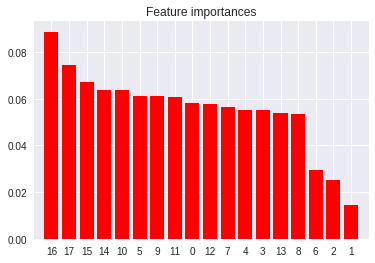

In [0]:
import operator
importances = tree_clf.feature_importances_
feature_names = df_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [0]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_updated = model.transform(X)
print('Total features count', np.array(X).shape[1])
print('Selected features', np.array(X_updated).shape[1])

Total features count 18
Selected features 11


### Multiple Linear Regression

In [0]:
important_features = [feature for (feature, score) in sorted_features]

# select the top most important feature and store into X array as input
# selecting 4 features by [:4]
X = df[important_features[:4]].values

# set Total Interactions as target
y = df['Total Interactions'].tolist()
X.shape

(500, 4)

In [0]:
# splitting data
# set the test_size for splitting the total data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# create the model
from sklearn.linear_model import LinearRegression
multi_lr_model = LinearRegression()

# fit the model with X and y

multi_lr_model.fit(X_train, y_train)

X_test = np.array(X_test)

# get predictions
y_pred = multi_lr_model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(multi_lr_model.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, multi_lr_model, multi_lr_model.coef_, multi_lr_model.intercept_

(2.392149293765294,
 0.9998995222098154,
 0.9998987102680765,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 array([0.99933   , 0.97931919, 1.04051365, 0.00126881]),
 -1.1760604444385763)

In [0]:
important_features.append('Total Interactions')
important_features

VIFDataSet = df[important_features]


['like',
 'share',
 'comment',
 'Lifetime People who have liked your Page and engaged with your post',
 'Lifetime Post Consumers',
 'Post Hour',
 'Lifetime Engaged Users',
 'Lifetime Post Consumptions',
 'Page total likes',
 'Lifetime Post Impressions by people who have liked your Page',
 'Lifetime Post Total Reach',
 'Post Weekday',
 'Post Month',
 'Lifetime Post reach by people who like your Page',
 'Lifetime Post Total Impressions',
 'Paid',
 'Category',
 'Type',
 'Total Interactions']

In [0]:
VIFDataSet.columns = [c.replace(' ', '_') for c in VIFDataSet.columns]
VIFDataSet.head(3)

,like,share,comment,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,Lifetime_Post_Consumers,Post_Hour,Lifetime_Engaged_Users,Lifetime_Post_Consumptions,Page_total_likes,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_Total_Reach,Post_Weekday,Post_Month,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_Post_Total_Impressions,Paid,Category,Type,Total_Interactions
0,79.0,17.0,4,119,109,3,178,159,139441,3078,2752,4,12,1640,5091,0.0,2,1,100
1,130.0,29.0,5,1108,1361,10,1457,1674,139441,11710,10460,3,12,6112,19057,0.0,2,2,164
2,66.0,14.0,0,132,113,3,177,154,139441,2812,2413,3,12,1503,4373,0.0,3,1,80


In [0]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Total_Interactions  ~ like	+ share	+ comment + 	Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post + 	Lifetime_Post_Consumers	+ Post_Hour + 	Lifetime_Engaged_Users	+ Lifetime_Post_Consumptions + 	Page_total_likes	+ Lifetime_Post_Impressions_by_people_who_have_liked_your_Page	+ Lifetime_Post_Total_Reach	+ Post_Weekday	+ Post_Month	+ Lifetime_Post_reach_by_people_who_like_your_Page	+  Lifetime_Post_Total_Impressions	+ Paid + 	Category	+ Type	',data= VIFDataSet, return_type='dataframe')

Multi-Collinearity detection in Python

In [0]:
vif_df = pd.DataFrame()
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
print(vif_df)

           vif                                           features
0   316.427293                                          Intercept
1    98.761478                                               like
2     9.700727                                              share
3     5.003829                                            comment
4     7.318752  Lifetime_People_who_have_liked_your_Page_and_e...
5   781.430993                            Lifetime_Post_Consumers
6     1.105835                                          Post_Hour
7   977.656334                             Lifetime_Engaged_Users
8     2.255248                         Lifetime_Post_Consumptions
9     9.660019                                   Page_total_likes
10   21.460406  Lifetime_Post_Impressions_by_people_who_have_l...
11   20.108420                          Lifetime_Post_Total_Reach
12    1.038885                                       Post_Weekday
13    9.810276                                         Post_Month
14   10.34

In [0]:
# Remove all the variables with VIF value >5

vif_df[(vif_df.features =='Intercept') | ( vif_df.vif <=5)]

,vif,features
0,316.427293,Intercept
6,1.105835,Post_Hour
8,2.255248,Lifetime_Post_Consumptions
12,1.038885,Post_Weekday
16,1.050808,Paid
17,1.320796,Category
18,1.601588,Type
